# Final Project, Part 3 - Analysis - Group 66
Group Members: Yiqing Li, Tianci Zheng

## Dataset introduction
In this project we use 'inc5000-2019.csv. It contains the information of 5000 Fastest Growing Pricate Companies in 2009 posted by Inc.com. The dataset comes from data.word.com, url:https://data.world/aurielle/inc-5000-2019. Original data sourced from Inc.com.

# Data Processing

### Key points
* The columns name are not in a good format, we should replace all columns' headers
* There might be some null values in each column
* The workers column is float. We need to transform it to int format
* The revenue column contains 'Million'. We need to remove it and transform the column into numerical value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://query.data.world/s/ht7xdrrd5gmthunpjxb7zg4yj7mymt')

In [3]:
df.head(3)

,_ - rank,Profile,name,url,state,_ - revenue,_ - growth,_ - industry,_ - workers,_ - founded,_ - yrs_on_list,_ - previous_workers,_ - metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,2015,1,5,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,2015,1,8,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,2015,1,10,Austin,Austin


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _ - rank              5012 non-null   int64  
 1   Profile               5012 non-null   object 
 2   name                  5012 non-null   object 
 3   url                   5012 non-null   object 
 4   state                 5012 non-null   object 
 5   _ - revenue           5012 non-null   object 
 6   _ - growth            5012 non-null   float64
 7   _ - industry          5012 non-null   object 
 8   _ - workers           5011 non-null   float64
 9   _ - founded           5012 non-null   int64  
 10  _ - yrs_on_list       5012 non-null   int64  
 11  _ - previous_workers  5012 non-null   int64  
 12  _ - metro             4199 non-null   object 
 13  city                  5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


### Clear the format of all columns' headers

In [5]:
df = df.rename(columns={'_ - rank':'rank', '_ - revenue':'revenue', '_ - growth':'growth', '_ - industry':'industry', '_ - workers':'workers', '_ - founded':'founded', '_ - yrs_on_list':'yrs_on_list', '_ - previous_workers':'previous_workers', '_ - metro':'metro'})
df.head(2)

,rank,Profile,name,url,state,revenue,growth,industry,workers,founded,yrs_on_list,previous_workers,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,2015,1,5,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,2015,1,8,Nashville,Brentwood


### Drop null values in certain colums
* Here we only drop null values in workers, because we will not take company with no workers into consideration

In [6]:
df['workers'].dropna()

0        40.0
1        39.0
2       190.0
3        57.0
4        25.0
        ...  
5007     88.0
5008    380.0
5009    187.0
5010    132.0
5011     27.0
Name: workers, Length: 5011, dtype: float64

### Clear the format of 'Revenue' , keep the numerical part and output the float type
There are two types of measures in the Revenue column, in Billion and Million. To unify the measures, first, we split the columns into a numeric column and a measure columns. Then, for each revenue in billions, we convert it to a value in millions by multiplying by 1000.

In [7]:
df[['revenue_in_million','measure']] = df.revenue.str.split(expand=True)
df['multiple'] = [ 1000 if m=='Billion' else 1 for m in df['measure']]
df['revenue_in_million']=df['revenue_in_million'].astype(float)
df['revenue_in_million']=df['revenue_in_million']*df['multiple']
df[df['measure']=='Billion'].head()
df = df.drop(columns={'measure','multiple'})

## Data analytics
### Analyze industry distribution

In [8]:
df_counts = df.groupby('industry')['name'].count().reset_index().sort_values('name', ascending=False)
df_counts.set_index('industry', inplace=True)
new_df_counts = df_counts['name'].astype(int)

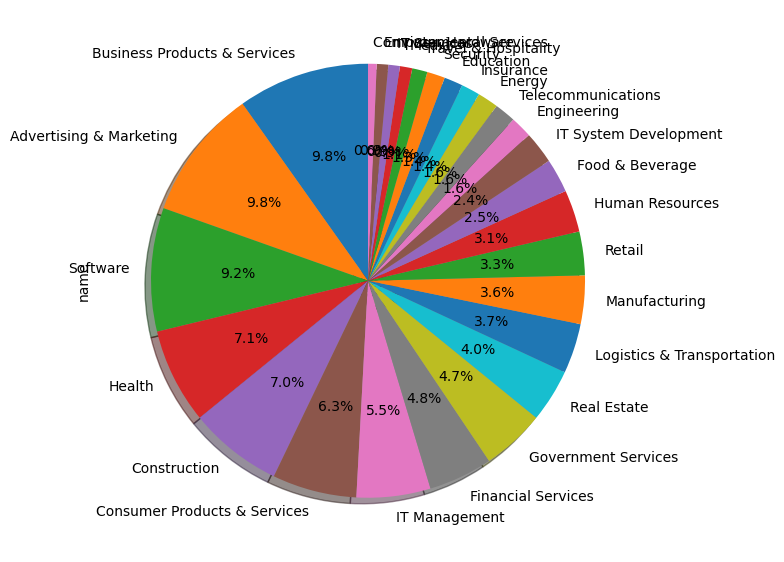

In [9]:
new_df_counts.plot(
kind='pie',
figsize=(7, 8),
autopct='%1.1f%%', 
startangle=90,     
shadow=True, 
)

#### Wrap up
We can obtain from the pie chart that the largest proportion of companies is in  Busines Products&Service industry, followed by the advertising marketing industry and Software industry. These 3 industries account for almost 30% of the total.

### Find the top 10 profitabe industry

In [10]:
average_revenue = df.groupby('industry').revenue_in_million.agg(revenue_average='mean').reset_index().sort_values('revenue_average', ascending=False)

In [11]:
average_revenue.head(10)

,industry,revenue_average
23,Security,123.747761
12,Health,109.330056
18,Logistics & Transportation,101.293011
6,Energy,80.221795
13,Human Resources,73.582166
4,Consumer Products & Services,72.073651
22,Retail,66.552761
11,Government Services,59.391949
17,Insurance,58.742857
3,Construction,58.422571


In [12]:
average_revenue.set_index('industry', inplace=True)

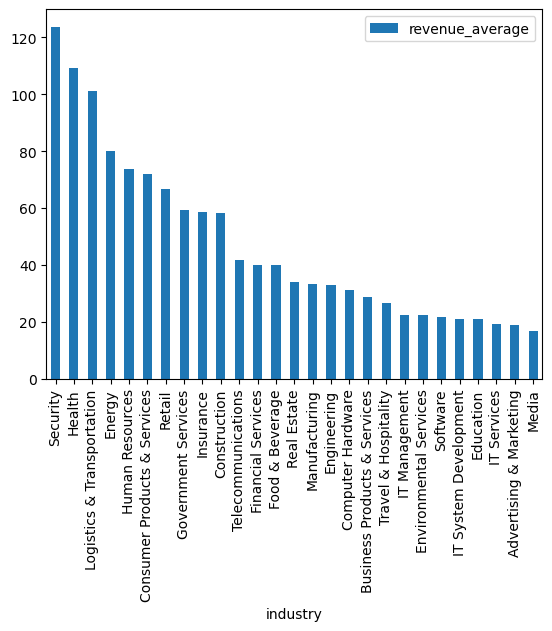

In [13]:
average_revenue.plot(kind='bar')

#### Wrap up
We can obtain from the bar chart that the most profitable industries are Insurance, follwed by Logistics&Transportation, Health, Energy, Finanica Service.Comparing to previous analysis, it's interesting to find the top 3 industries with the highest proportion are not among the top 10 profitable industries. We can infer that the number of companies in each type of business package is not related to the average turnover of the industry.

In addition, it is worth noting that the health industry accounts for a large proportion(ranked 4th)with a high revenue(ranked 3rd), representing a good develpment trends. In order to interpret the dataset more comprehensively, we will explore more dimensions to evaluate the performance of different industries to highlight industries with development potential.

### Build Dashboard

In [14]:
import altair as alt

In [15]:
brush = alt.selection_interval(encodings=['x','y'])

In [16]:
heatmap = alt.Chart.from_dict({
  "data": {
    "url": "https://raw.githubusercontent.com/TianciZheng/TianciZheng.github.io/main/cleaned_inc5000-2019.csv"
  },
  "mark": "rect",
  "encoding": {
    "x": {"field": "industry", "type": "ordinal"},
    "y": {"field": "state", "type": "ordinal"},
    "color":{"aggregate":"count", "type":"quantitative"}
  },
  "height": 300,
  "width": 300,
}).add_selection(
    brush
)

#heatmap

In [17]:
bar = alt.Chart.from_dict({
  "data": {
    "url": "https://raw.githubusercontent.com/TianciZheng/TianciZheng.github.io/main/cleaned_inc5000-2019.csv"
  },
  "mark": "bar",
  "encoding": {
    "x": {"field": "yrs_on_list", "type": "ordinal","sort":"-y"},
    "y": {"aggregate": "average", "field": "revenue_in_million", "type": "quantitative"}
  },
  "height": 300,
  "width": 300,
}
).transform_filter(
    brush
)
#bar

In [18]:
dashboard = heatmap | bar
dashboard

alt.HConcatChart(...)

#### Dashboard Write Up
There are two components in our dashboard. The left part is a heatmap visualization that plots out the company industries and the states they reside. The different color shows the different amount of companies in each combination. The chart horizontally shows the business types per state and their count. And looking at the grid vertically can find the distribution of various industries in the United States.

As for the right bar chart, the x-axis is the length that companies have been on the Inc 5000 list, and the y-axis is an aggregate measure of the average revenue. The chart not only shows the financial status of companies but also depicts potential relationships between the revenue and the total time length.

Looking at the dashboard holistically provides great flexibility for people to find different but detailed information based on their needs. For example, people who are only interested in companies in IL and IN can select these two rows, and the bar chart will vary to show the specific performance

### Total revenue by industry

In [19]:
chart1 = alt.Chart.from_dict({
  "data": {
    "url": "https://raw.githubusercontent.com/TianciZheng/TianciZheng.github.io/main/cleaned_inc5000-2019.csv"
  },
  "mark": "bar",
  "encoding": {
    "y": {"field": "industry", "type": "ordinal", "sort": "-x", "title": "Industry Category"},
    "x": {
      "aggregate": "sum",
      "field": "revenue_in_million",
      "type": "quantitative",
      "title": "Gross Revenue (in million)"
    }, 
      "color": {"field": "industry"}},

  "height": 600,
  "width": 500,
})
chart1

alt.Chart(...)

#### Write-Up
Revenue is always an important measure to a company and can reflect many facets, such as operations and financial status. We created a horizontal bar chart by calculating the total revenue based on the industry to find the top sectors that make the most money. As shown in Fig 2, we can see that Health, Consumer Products & Services, and Construction were the industries with the highest revenue in 2019. And the Health section even made above 38,000 million, which was twice as much as second place. The graph shows us which industries are promising and which ones are not. It provides a very good reference for people and entrepreneurs to determine the future direction of their companies.

### Average Employee Count

In [20]:
chart2 = alt.Chart.from_dict({
  "data": {
    "url": "https://raw.githubusercontent.com/TianciZheng/TianciZheng.github.io/main/cleaned_inc5000-2019.csv"
  },
  "height": 400,
  "width": 500,
  "transform": [{"filter": "datum.founded >= 1989"}],
  "mark": "line",
  "encoding": {
    "x": {"field": "founded", "type": "ordinal","title":"Founded Year"},
    "y": {"field": "workers", "aggregate": "average", "type": "quantitative","title":"Average Employee Count"},
    "color": {"value": "purple"}
  },
})
chart2

alt.Chart(...)

#### Write Up
We think it is necessary to help people learn from fast-growing companies about their strategies in employment. Analyzing the trend of employee count can achieve the purpose. So, We created another line chart (Fig 4) to show the average number of employees for companies founded at different times. According to the above figure, there is a declining trend which is reasonable as newly established companies tend to have fewer employers. An interesting finding is that most companies have a total number of employees between 100 and 400. We believe this range reflects the number of employees a healthy growing company should maintain. Therefore, people can rely on this interval to judge if they need to control the employee size or continue hiring for faster development.

### Conclusion
To conclude, our project utilizes the dashboard to show the distribution of different industries in different states and their financial performances. We also plotted gross revenue and employment trend, aiming to give better insights into the most successful growth companies in the United States. We hope our work can benefit entrepreneurs who would like to learn from others and better develop their companies.